## Activity 2.03: Loading Audio Data for Processing Activity

The result of this activity is will be to create an audio dataset object that can be used for Tensorflow model training.

## Import tensorflow API and os module

In [1]:
import tensorflow as tf
import os

## Create a function to load and decode an audio file

In [4]:
def load_audio(file_path, sample_rate=44100):
    audio = tf.io.read_file(file_path)
    audio, sample_rate = tf.audio.decode_wav(audio,
                                            desired_channels=1, desired_samples=sample_rate)
    
    return tf.transpose(audio)

## Load the audio paths using os.listdir

In [6]:
prefix = "../Datasets/data_speech_commands_v0.02/zero/"

paths = [os.path.join(prefix, paths) for paths in os.listdir(prefix)]

## Create a function that takes a dataset object, shuffles it, and loads the audio using the load_audio function

In [8]:
def prep_ds(ds, shuffle_buffer_size=1024, batch_size=64):
    # Randomly shuffle dataset
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    # Load and decode audio file from file paths
    ds = ds.map(load_audio)
    # Take the absolute value
    ds = ds.map(tf.abs)
    # Apply log1p function
    ds = ds.map(tf.math.log1p)
    # Repeat dataset forever
    ds = ds.repeat()
    # Prepare batches
    ds = ds.batch(batch_size)
    # Prefetch
    ds = ds.prefetch(buffer_size=batch_size)
    
    return ds

In [9]:
ds = tf.data.Dataset.from_tensor_slices(paths)

train_ds = prep_ds(ds)

In [10]:
for x in train_ds.take(1):
    print(x)

tf.Tensor(
[[[5.4805797e-02 9.1340572e-02 7.0485085e-02 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 [[6.1033294e-05 3.0512922e-04 2.7462048e-04 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 [[1.6465929e-03 2.7428172e-03 3.2600611e-03 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 ...

 [[3.5946060e-03 7.5701508e-03 8.9019109e-03 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 [[1.5257625e-04 1.5257625e-04 5.1866431e-04 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 [[4.7190720e-03 5.3567206e-03 5.2656531e-03 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]], shape=(64, 1, 44100), dtype=float32)


## Plot the first audio file from the batch

The output will show the first batch of MFCC spectrum values in tensor form

Text(0, 0.5, 'Value')

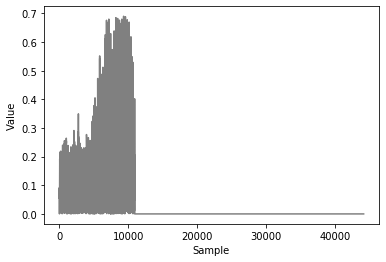

In [12]:
import matplotlib.pyplot as plt

plt.plot(x[0,:,:].numpy().T, color='gray')

plt.xlabel('Sample')

plt.ylabel('Value')